# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

In this exercise, we  will generate random numbers from the continuous disributions we learned in the lesson. There are two ways to generate random numbers:

1. Using the numpy library 
1. using the Scipy library 

Use either or both of the lbraries in this exercise.

## Uniform Distribution

To generate uniform random numbers between any two given values using scipy, we can either use the following code or the code that we have
discussed in class:

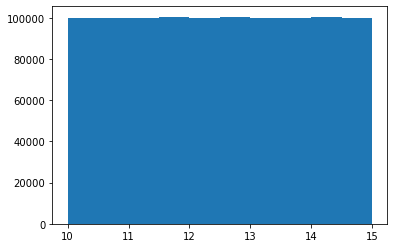

In [160]:
from scipy.stats import uniform
x = uniform.rvs(size=1000000)
a = 10
b = 15
randoms  = a + (b-a)*x

plt.hist(randoms)
plt.show()

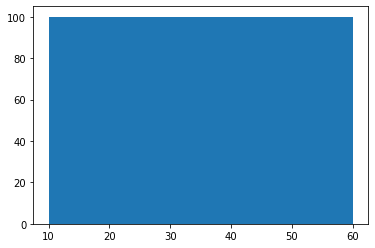

In [167]:
plt.hist(uniform2)
plt.show()

**Your task:**

1. Based on the code above, write a function that generates uniformly distributed random numbers. There are several requirements for your function:
    * It should accept 3 parameters: 
        * `bottom` - the lower boundary of the generated numbers
        * `ceiling` - the upper boundary of the generated numbers
        * `count` - how many numbers to generate
    * It should return an array of uniformly distributed random numbers

1. Call your function with 2 sets of params below:
    * bottom=10, ceiling=15, count=100
    * bottom=10, ceiling=60, count=1,000

1. Plot the uniform distributions generated above using histograms, where x axis is the value and y axis is the count. Let the histogram's number of bins be 10.

Your output should look like below:

![uniform distribution](ud.png)

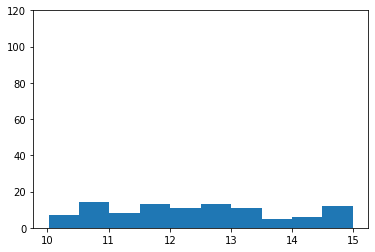

In [163]:
# using numpy.random.uniform
import matplotlib.pyplot as plt   
uniform1 = np.random.uniform(low=10.0, high=15.0, size=100)
uniform2 = np.random.uniform(low=10.0, high=60.0, size=1000)
hist1 = plt.hist(uniform1,10)
plt.ylim(0,120)
plt.show()


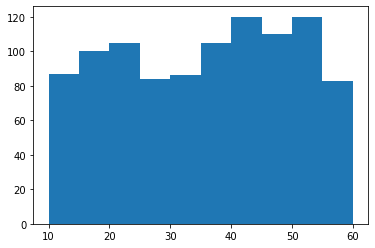

In [164]:
plt.hist(uniform2,10)
#plt.ylim(0,120)
plt.show()

How are the two distributions different?

In [20]:
# your answer here:

'''
distribution 2 is becoming more uniform (rectangular) as the number of observations increases. 
'''


## Normal Distribution

1. In the same way in the Uniform Distribution challenge, write a function that generates normally distributed random numbers.
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 1
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 50
2. Plot the distributions of the data generated.

Expected output:

![normal distribution](nd.png)

In [76]:
# your code here

def normal_function(average,deviation,size):
    mu, sigma = average, deviation
    x = mu + sigma * np.random.randn(size)
    return x

normal1 = normal_function(10,1,1000)
normal2 = normal_function(10,50,1000)

How are the two distributions different?

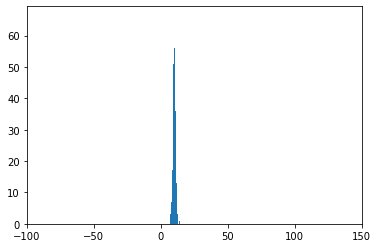

In [170]:
plt.hist(normal1,50)
plt.xlim(-100,150)
plt.show()

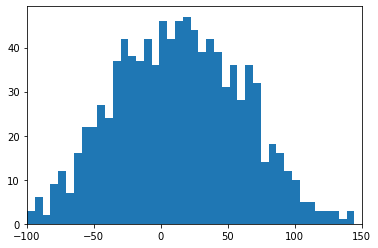

In [169]:
plt.hist(normal2,50)
plt.xlim(-100,150)
plt.show()

In [182]:
# your answer here:

'''
normal1 has a higher kurtosis than normal2, 
meaning the data is more concentrated towards the mean given the standard deviation is significantly lower.

'''

'\nnormal1 has a higher kurtosis than normal2, \nmeaning the data is more concentrated towards the mean given the standard deviation is significantly lower.\n\n'

## Normal Distribution of Real Data

In this challenge we are going to take a look the real data. We will use vehicles.csv file for this exercise

First import vehicles.csv.
Then plot the histograms for the following variables:

1. Fuel Barrels/Year

In [80]:
# your code here
vehicles = pd.read_csv('/Users/olivercorbisiero/documents/module-2/lab-probability-distributions/your-code/vehicles.csv')

In [81]:
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


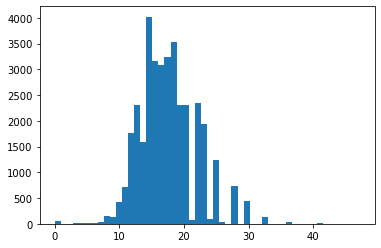

In [89]:
plt.hist(vehicles['Fuel Barrels/Year'],50)
plt.show()

2. CO2 Emission Grams/Mile 

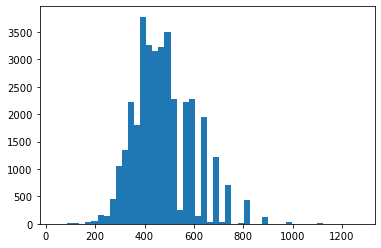

In [90]:
# your code here
plt.hist(vehicles['CO2 Emission Grams/Mile'],50)
plt.show()

3. Combined MPG

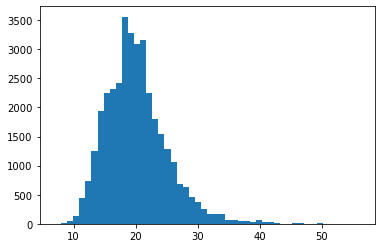

In [91]:
# your code here
plt.hist(vehicles['Combined MPG'],50)
plt.show()

Which one(s) of the variables are nearly normally distributed? How do you know?

In [190]:
# you answer here:
from scipy.stats import skew
print('fuel barrels/year skew:',skew(vehicles['Fuel Barrels/Year']))
print('CO2 Emission Grams/Mile skew: ',skew(vehicles['CO2 Emission Grams/Mile']))
print('Combined MPG skew: ',skew(vehicles['Combined MPG']))
print()
print('fuel barrels/year mean vs median:',vehicles['Fuel Barrels/Year'].mean(),"vs",vehicles['Fuel Barrels/Year'].median())
print('CO2 Emission Grams/Mile mean vs median: ',vehicles['CO2 Emission Grams/Mile'].mean(),'vs',vehicles['CO2 Emission Grams/Mile'].median())
print('Combined MPG mean vs median: ',vehicles['Combined MPG'].mean(),'vs',vehicles['Combined MPG'].median())



fuel barrels/year skew: 0.6382445784906978
CO2 Emission Grams/Mile skew:  0.7416608937445334
Combined MPG skew:  1.0677281511016457

fuel barrels/year mean vs median: 17.609055502328133 vs 17.347894736842107
CO2 Emission Grams/Mile mean vs median:  475.3163392572124 vs 467.73684210526324
Combined MPG mean vs median:  19.92932242990654 vs 19.0


In [ ]:
'''
fuel barrels/year has the lowest skew and the most divergent values for mean and median.

NOTE: i wanted to check how many values for each distribution there were within 1 standard deviation of the mean
but i spent too long trying this so decided to move on. 
if i have more time I will apply some of these tests:
docs.google.com/spreadsheets/d/12JwCI-lD3CnpD5b_e4nMJ-3o0VwyHI823do5RmMLegQ/edit#gid=0

'''

## Exponential Distribution

1. Using `numpy.random.exponential`, create a function that returns a list of numbers exponentially distributed with the mean of 10. 

1. Use the function to generate two number sequences with a mean of 1 and 100 and a size of 1000.

1. Plot the distributions as histograms with the number of bins as 100.

Your output should look like below:

![exponential distribution](ed.png)

In [173]:
# exponential distribution with mean of 10.
from scipy.stats import expon
lambda_inv=10
exp_dist = expon(scale=lambda_inv)



0.9043311235771307


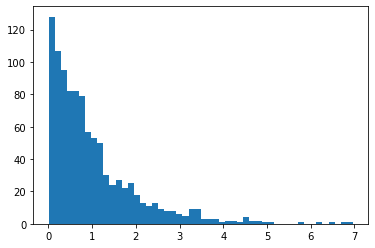

In [174]:
#mean of 1, size 1000
lambda_inv=1
exp_dist = expon(scale=lambda_inv)
print(exp_dist.rvs(1000).std())
plt.hist(exp_dist.rvs(1000),50)
plt.show()

How are the two distributions different?

98.67925853571832


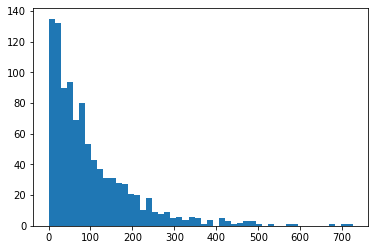

In [179]:
# your answer here:
lambda_inv=100
exp_dist = expon(scale=lambda_inv)
print(exp_dist.rvs(1000).std())
plt.hist(exp_dist.rvs(1000),50)

plt.show()

In [ ]:
# your answer here:
'''
They are different in absolute sense. But in terms of 
'''

## Exponential Distribution of Real Data

Suppose that the amount of time one spends in a bank is exponentially distributed with mean as 10 minutes (i.e. λ = 1/10). What is the probability that a customer will spend less than fifteen minutes in the bank? 

Write a code in python to solve this problem

In [180]:
# your answer here
# Hint: This is same as saying P(x<15)
lambda_inv = 10
exponential_dist = expon(scale=lambda_inv)

print('probability less than 15 minutes is: ',exponential_dist.cdf(15))


probability less than 15 minutes is:  0.7768698398515702


What is the probability that the customer will spend more than 15 minutes

In [181]:
# your answer here

print('probability more than 15 minutes is: ',1- exponential_dist.cdf(15))

probability more than 15 minutes is:  0.2231301601484298
